In [2]:
from google.colab import files
up = files.upload()

Saving TSLA.csv to TSLA.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

data = pd.read_csv("TSLA.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-12,685.700012,704.799988,682.090027,701.979980,701.979980,29135700
1,2021-04-13,712.700012,763.000000,710.659973,762.320007,762.320007,44652800
2,2021-04-14,770.700012,780.789978,728.030029,732.229980,732.229980,49017400
3,2021-04-15,743.099976,743.690002,721.309998,738.849976,738.849976,27848900
4,2021-04-16,728.650024,749.409973,724.599976,739.780029,739.780029,27979500
...,...,...,...,...,...,...,...
248,2022-04-04,1089.380005,1149.910034,1072.530029,1145.449951,1145.449951,27345300
249,2022-04-05,1136.300049,1152.869995,1087.300049,1091.260010,1091.260010,26691700
250,2022-04-06,1073.469971,1079.000000,1027.699951,1045.760010,1045.760010,29782800
251,2022-04-07,1052.390015,1076.589966,1021.539978,1057.260010,1057.260010,26482400


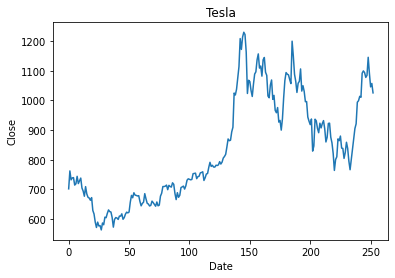

In [4]:
# vizualize close data
close = data['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [5]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]

In [6]:
data = data.rename(columns={"Date" : "ds", "Close" : "y" })

In [7]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
613,2023-04-04,629.587364,22.152190,1218.808303
614,2023-04-05,630.578141,37.077126,1204.177674
615,2023-04-06,622.215208,13.109285,1196.867580
616,2023-04-07,620.392352,25.814737,1218.979348
617,2023-04-08,656.657047,41.538259,1248.445399


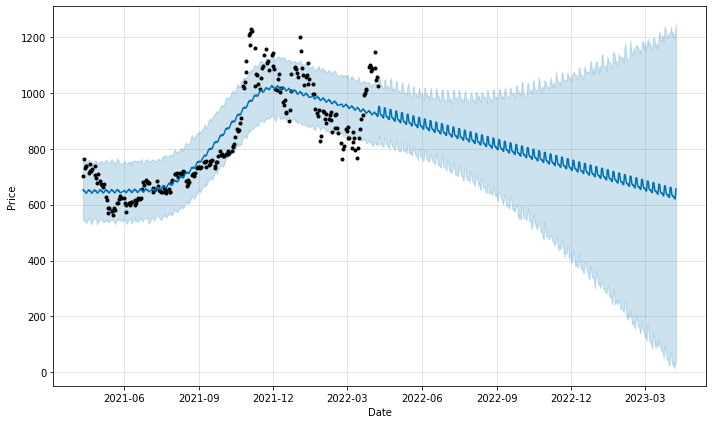

In [8]:
raph = model.plot(forcast, xlabel="Date", ylabel="Price")